<br>
<br>

***
***
# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Data gatherer
***
***

This notebook gathers data from the webcam. When you run the code, a video display of (mirrored) webcam output should be shown. Move this to the position you wish on the screen. Press the spacebar to start recording, and the text output of the current cell will show how many fingers should be displayed at this point. Hold up that number of fingers in different positions until the screen turns to greyscale. At this point, you should raise another finger, and press the spacebar again to start recording the next set of images.
<br><br>
These images will be put into the location given by the variable `path`. These will be automatically and randomly partitioned into 3 subfolders (train, cv, and test), and again into 5 subsubfolders, for ease of use by the keras method `flow_from_directory` which generates data and labels from folders of images.

In [2]:
import numpy as np
from numpy import array as na
from matplotlib import pyplot as plt
%matplotlib inline
import sys
import os
import cv2
from PIL import Image
import time
path = '/Users/Scott/Google Drive/Python scripts/Data Science/CCTV/'

## Data collection (main)

Run this to gather images for training, cv, and testing.

In [2]:
trainFrac = 0.7 # What fraction of the data should be used for training.
cvFrac    = 0.1 # What fraction of the data should be used for cross-validation. 

save = 1 # Set this to 0 to run the code without saving new files.

imagecount = 300 # Number of images in each class to record per run.
imSize = 128     # Image width in pixels. The images are resized to be square.

# Here we create the local folders if they don't already exist.
for exampleType in ['train','cv','test']:
    for fnum in [1,2,3,4,5]:
        os.makedirs(path+'datafiles/{}/finger_{}'.format(exampleType,fnum), exist_ok=True)

# Initialise loop variables.
count = 0
record = 0
finger = 1
breaker=0

# Choose a random set of indices to correspond to train/cv/test.
fileIndices = np.arange(imagecount)
np.random.shuffle(fileIndices)
trainIndices = fileIndices[:int(len(fileIndices)*trainFrac)]
cvIndices    = fileIndices[int(len(fileIndices)*trainFrac):int(len(fileIndices)*(trainFrac+cvFrac))]
testIndices  = fileIndices[int(len(fileIndices)*(trainFrac+cvFrac)):]

video = cv2.VideoCapture(0)
while True and count < imagecount:
    _, frame = video.read()
    frame = cv2.flip(frame,1)
    cv2.imshow('Video', frame)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
    if key == ord(' '):
        if record==0:
            record=1
            print('Recording')
            print('Finger 1',end=' ')
            
    if record==1:
        count += 1
        im = Image.fromarray(frame, 'RGB')
        im = im.resize((imSize,imSize))
        if count in trainIndices:
            exampleType = 'train'
        elif count in cvIndices:
            exampleType = 'cv'
        elif count in testIndices:
            exampleType = 'test'
        directory  = path+'datafiles/{}/finger_{}'.format(exampleType,finger)
        filename = len(os.listdir(directory))+1
        if save:
            im.save(os.path.join(directory, str(filename)+".jpg"), "JPEG")
        if count==imagecount:
            count=0
            finger+=1
            if finger==6:
                print('\nDone')
                break
            print('...')
            while True:
                _, frame = video.read()
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frame = cv2.flip(frame,1)
                cv2.imshow('Video', frame)
                key=0
                key=cv2.waitKey(1)
                if key == ord(' '):
                    break
                if key == ord('q'):
                    breaker=1
                    break
            print('Finger {}'.format(finger),end=' ')
            if breaker:
                break 
video.release()
cv2.destroyAllWindows()

Recording
Finger 1 ...
Finger 2 ...
Finger 3 ...
Finger 4 ...
Finger 5 
Done


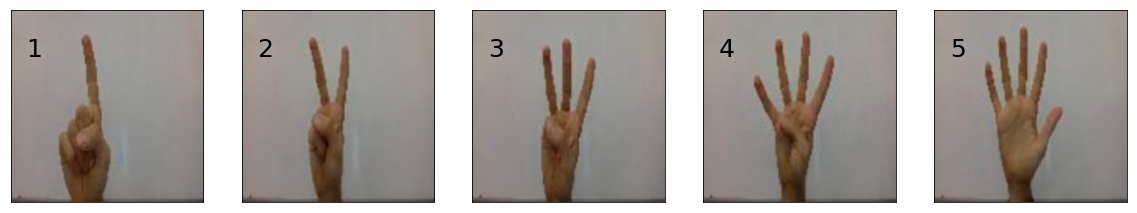

In [8]:
imSet = [cv2.imread(path+'datafiles/train/finger_{}/30.jpg'.format(i)) for i in range(1,6)]
fig,axSet = plt.subplots(ncols=5,figsize=(20,4));
[axSet[i].imshow(imSet[i],interpolation='bicubic') for i in range(5)]
[ax.set_xticks([]) for ax in axSet];
[ax.set_yticks([]) for ax in axSet];
[ax.text(10,30,'{}'.format(i+1),fontsize=25) for (i,ax) in enumerate(axSet)];
plt.show();
plt.savefig('fingersx5.png',bbox_inches='tight');

## Data collection (single image)

This is used to get single images, which can then be used in the image localisation script in `CCTV_cloud.ipynb`.

In [3]:
imSize = 128
singleShots = path+'singleShots'
os.makedirs(singleShots, exist_ok=True)
video = cv2.VideoCapture(0)
while True:
    _, frame = video.read()
    frame = cv2.flip(frame,1)
    cv2.imshow('Video', frame)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
    if key == ord(' '):
        time.sleep(2) # Comment out this line to take photo instantly
        im = Image.fromarray(frame, 'RGB')
        im = im.resize((imSize,imSize))
        filename = len(os.listdir(singleShots))+1
        im.save(os.path.join(singleShots, str(filename)+".jpg"), "JPEG")
        break
video.release()
cv2.destroyAllWindows()